In [ ]:
# <-- Import libraries, custom functions, and load configuration & datasets <--

import yaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

# <-- Imports custom preprocessing functions from 'functions.py' <--

from functions import (drop_duplicates,
                       concat_dataframes,
                       remove_all_punctuation,
                       drop_irrelevant_columns,
                       standardize_column_names,
                       filter_by_regex_pattern,
                       standardize_dates
                       )

# <-- Loads YAML configuration to dynamically reference CSV output files. <--

config = None  # <-- Initialize config
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")
config

df_merged = pd.read_csv(config['output_data']['file1'])
df_data_analyst = pd.read_csv(config['output_data']['file2'])
df_keywords = pd.read_csv(config['output_data']['file3'])


In [ ]:
# Display df_merged DataFrame structure and summary
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agency             5271 non-null   object 
 1   #_of_positions     5271 non-null   int64  
 2   business_title     5271 non-null   object 
 3   level              5271 non-null   object 
 4   job_category       5271 non-null   object 
 5   career_level       5271 non-null   object 
 6   salary_range_from  5271 non-null   float64
 7   salary_range_to    5271 non-null   float64
 8   salary_frequency   5271 non-null   object 
 9   preferred_skills   3335 non-null   object 
 10  posting_date       2045 non-null   object 
 11  post_until         2001 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 494.3+ KB


In [ ]:
# Display df_data_analyst DataFrame structure and summary
df_data_analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agency             43 non-null     object 
 1   #_of_positions     43 non-null     int64  
 2   business_title     43 non-null     object 
 3   level              43 non-null     object 
 4   job_category       43 non-null     object 
 5   career_level       43 non-null     object 
 6   salary_range_from  43 non-null     float64
 7   salary_range_to    43 non-null     float64
 8   salary_frequency   43 non-null     object 
 9   preferred_skills   20 non-null     object 
 10  posting_date       20 non-null     object 
 11  post_until         36 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.2+ KB


In [ ]:
# Display df_keywords DataFrame structure and summary
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agency             2648 non-null   object 
 1   #_of_positions     2648 non-null   int64  
 2   business_title     2648 non-null   object 
 3   level              2648 non-null   object 
 4   job_category       2648 non-null   object 
 5   career_level       2648 non-null   object 
 6   salary_range_from  2648 non-null   float64
 7   salary_range_to    2648 non-null   float64
 8   salary_frequency   2648 non-null   object 
 9   preferred_skills   2648 non-null   object 
 10  posting_date       1025 non-null   object 
 11  post_until         813 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 248.4+ KB


In [ ]:
# Apply standard date formatting to all DataFrames
data_frames = [df_keywords,df_data_analyst,df_merged]
date_cols = ['posting_date', 'post_until']
for df in data_frames:
    df = standardize_dates(df,date_cols)

In [ ]:
# Inspect df_keywords after date standardization
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   agency             2648 non-null   object        
 1   #_of_positions     2648 non-null   int64         
 2   business_title     2648 non-null   object        
 3   level              2648 non-null   object        
 4   job_category       2648 non-null   object        
 5   career_level       2648 non-null   object        
 6   salary_range_from  2648 non-null   float64       
 7   salary_range_to    2648 non-null   float64       
 8   salary_frequency   2648 non-null   object        
 9   preferred_skills   2648 non-null   object        
 10  posting_date       1025 non-null   datetime64[ns]
 11  post_until         334 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 248.4+ KB


In [39]:
# Conclusion
# With these plots, we are able to visually and quantitatively compare:

# Salary characteristics
# Posting frequency and trends
# Contract types
# Agency and job category distribution
# Career level
# Posting durations and openness

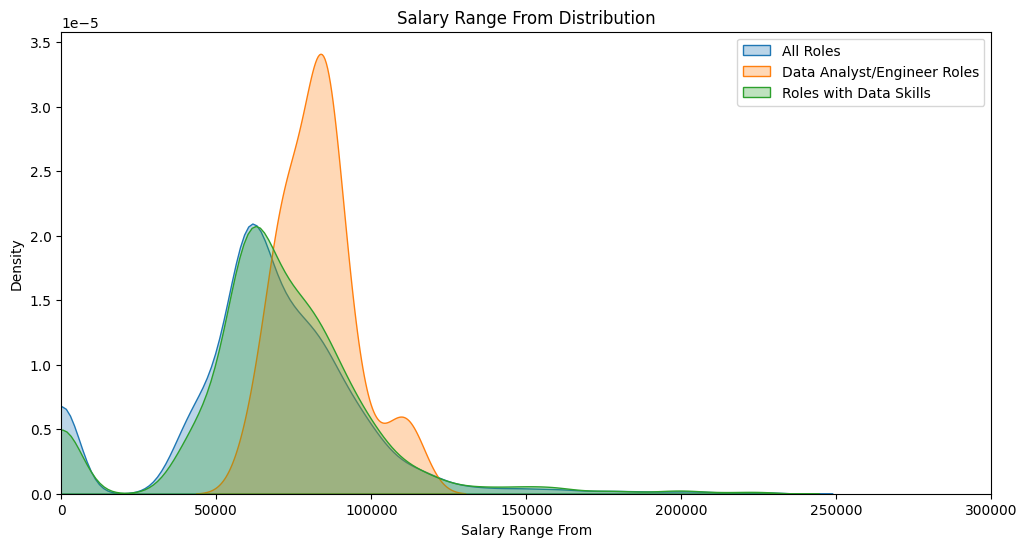

In [ ]:
# 1. Salary Distribution Comparison
# Insight:
# Data roles and jobs requiring modern data skills tend to have higher salary ranges than the general job population.

# What to look for:
# Are data roles and “preferred_skills” roles shifted higher than the general population?
# Are there outliers or salary bands unique to these groups?

# --> Visualize salary distributions across job groups
#
# - Plots kernel density estimates (KDE) for starting salary ranges across all jobs, data roles, and roles with data skills.
# - Reveals differences in salary bands and highlights whether data-centric roles command higher pay or exhibit unique outliers.
#
# How to read this chart:
# - Each curve shows the distribution of starting salaries for a group.
# - Peaks indicate the most common salary ranges; curves shifted right mean higher salaries.
# - Compare the three groups to see which roles typically offer higher or lower starting pay.

plt.figure(figsize=(12,6))
sns.kdeplot(df_merged['salary_range_from'], label='All Roles', fill=True, alpha=0.3)
sns.kdeplot(df_data_analyst['salary_range_from'], label='Data Analyst/Engineer Roles', fill=True, alpha=0.3)
sns.kdeplot(df_keywords['salary_range_from'], label='Roles with Data Skills', fill=True, alpha=0.3)
plt.title('Salary Range From Distribution')
plt.xlabel('Salary Range From')
plt.xlim(0, 300000)
plt.legend()
plt.show()

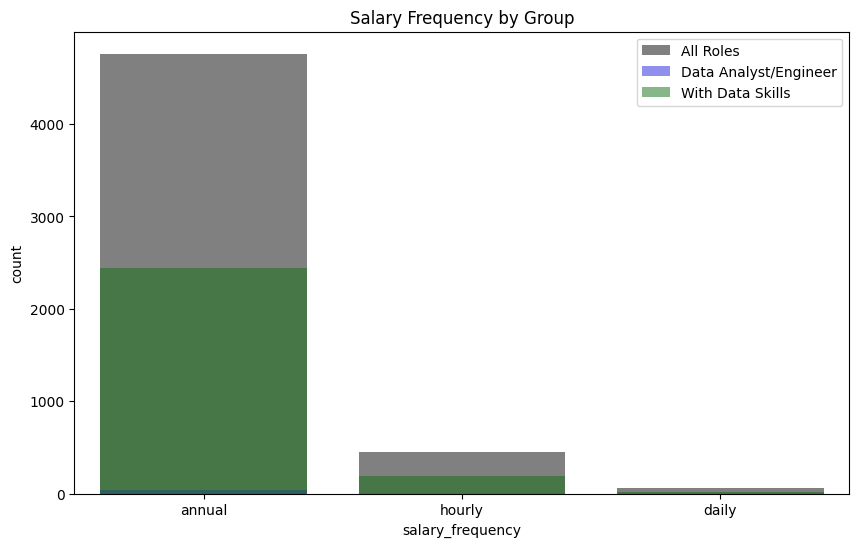

In [ ]:
# 2. Salary Frequency by Group
# Insight:
# Jobs with data-centric titles or skills tend to be annual, not hourly.

# Are “Annual” contracts more frequent in data roles?
# Is “Hourly” rare?

# -- > Compare salary frequency (annual, hourly, etc.) by group
#
# - Uses overlaid count plots to compare how often roles in each group are annual, hourly, etc.
# - Assesses whether data-related jobs are more likely to be salaried versus contract/hourly.
#
# How to read this chart:
# - Each bar shows the number of postings in each pay frequency category (annual, hourly, etc.) for each group.
# - Taller bars mean more jobs of that pay type; overlapping colors reveal group differences.
# - Look for dominance of 'Annual' pay in data roles versus the general job population.

plt.figure(figsize=(10,6))
ax = sns.countplot(x='salary_frequency', data=df_merged, color='gray', label='All Roles')
sns.countplot(x='salary_frequency', data=df_data_analyst, color='blue', alpha=0.5, label='Data Analyst/Engineer', ax=ax)
sns.countplot(x='salary_frequency', data=df_keywords, color='green', alpha=0.5, label='With Data Skills', ax=ax)
plt.title('Salary Frequency by Group')
# plt.xticks(rotation=30)
plt.legend()
plt.show()

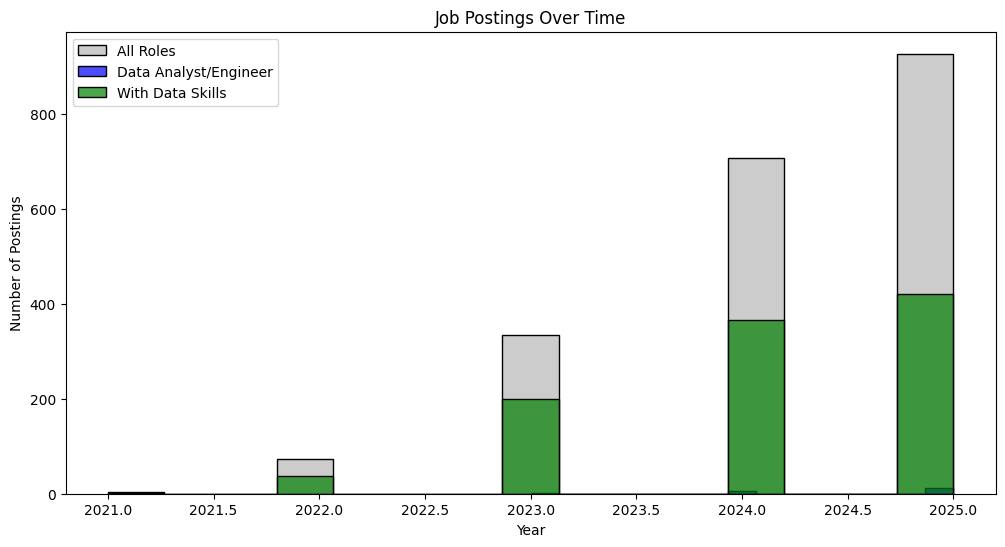

In [ ]:
# 3. Job Posting Trends Over Time
# Insight:
# Are data-related jobs being posted more frequently in recent years?

# What to look for:
# Has there been an uptick in data-related roles?
# Are data jobs “younger” than the overall dataset?

# -- > Show job posting trends over time by group
#
# - Plots histograms of job posting years for all jobs, data analyst/engineer roles, and data-skilled roles.
# - Used to detect whether demand for data talent is rising and if data jobs are “younger” (more recent).
#
# How to read this chart:
# - The x-axis shows job posting year; y-axis is number of postings.
# - Each color represents a group; taller bars mean more postings in that year.
# - Compare when data jobs and all jobs were posted to see if data roles are a newer trend.

plt.figure(figsize=(12,6))
sns.histplot(df_merged['posting_date'].dt.year.dropna(), label='All Roles', color='gray', alpha=0.4, bins=15)
sns.histplot(df_data_analyst['posting_date'].dt.year.dropna(), label='Data Analyst/Engineer', color='blue', alpha=0.7, bins=15)
sns.histplot(df_keywords['posting_date'].dt.year.dropna(), label='With Data Skills', color='green', alpha=0.7, bins=15)
plt.title('Job Postings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Postings')
plt.legend()
plt.show()

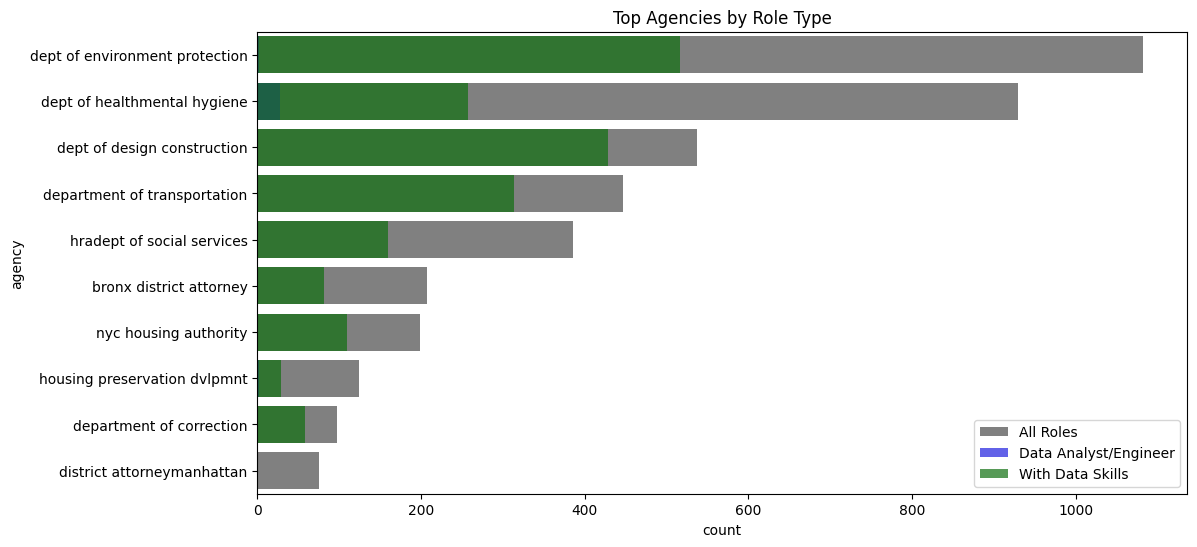

In [ ]:
# 4. Distribution of Agencies by Group
# Insight:
# Are certain agencies more likely to offer data-related roles?

# What to look for:
# Are some agencies highly represented in data jobs?
# Do “data skills” jobs cluster in a few agencies?

# --> Compare the distribution of hiring agencies by group
#
# - Plots the most common agencies for all jobs, data analyst/engineer roles, and data-skilled roles.
# - Helps identify which agencies are most active in hiring for data-related positions versus the general market.
#
# How to read this chart:
# - Each bar (or segment in a count plot) represents an agency, with height proportional to the number of postings.
# - Compare the top agencies across groups to spot specialization or concentration in data hiring.
# - A few dominant agencies in data roles may suggest specialized recruiters or public sector trends.

top_agencies = df_merged['agency'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.countplot(y='agency', data=df_merged[df_merged['agency'].isin(top_agencies)], 
              order=top_agencies, color='gray', label='All Roles')
sns.countplot(y='agency', data=df_data_analyst[df_data_analyst['agency'].isin(top_agencies)],
              order=top_agencies, color='blue', alpha=0.7, label='Data Analyst/Engineer')
sns.countplot(y='agency', data=df_keywords[df_keywords['agency'].isin(top_agencies)],
              order=top_agencies, color='green', alpha=0.7, label='With Data Skills')
plt.title('Top Agencies by Role Type')
plt.legend()
plt.show()

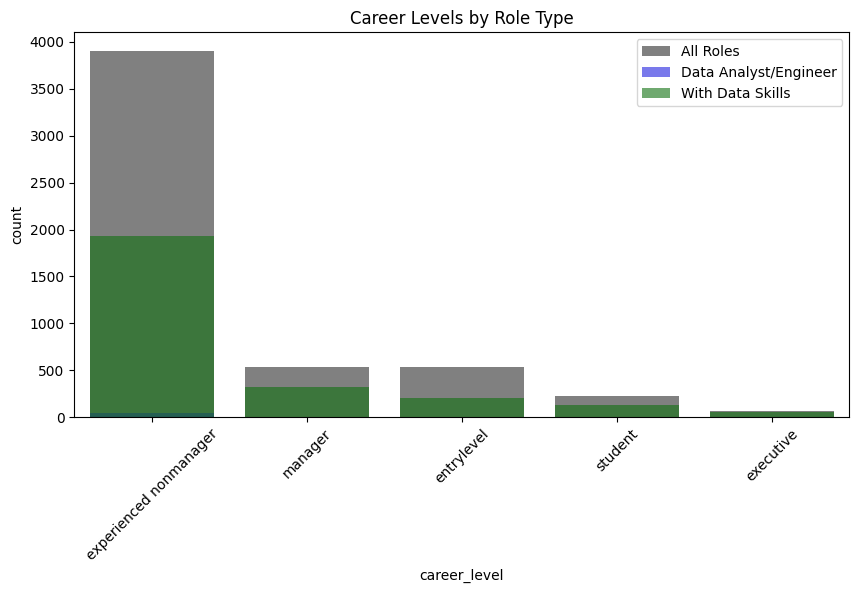

In [ ]:
# 5. Career Level Comparison
# Insight:
# Data roles may require higher or more specialized career levels.

# What to look for:
# Are “Manager” or “Experienced” levels overrepresented in data jobs?

# --> Visualize career level distribution by job group
#
# - Compares the prevalence of different career levels (Entry, Mid, Senior, etc.) in each group.
# - Useful for assessing whether data roles skew more junior, senior, or mirror general trends.
#
# How to read this chart:
# - Each bar shows how many postings fall into each career level for a given group.
# - Taller bars mean more jobs at that level; compare group colors to see if data roles tend to require more experience.
# - Look for over- or under-representation at certain levels among data jobs.

plt.figure(figsize=(10,5))
sns.countplot(x='career_level', data=df_merged, color='gray', label='All Roles', order=df_merged['career_level'].value_counts().index)
sns.countplot(x='career_level', data=df_data_analyst, color='blue', alpha=0.6, label='Data Analyst/Engineer')
sns.countplot(x='career_level', data=df_keywords, color='green', alpha=0.6, label='With Data Skills')
plt.title('Career Levels by Role Type')
plt.xticks(rotation=45)
plt.legend()
plt.show()

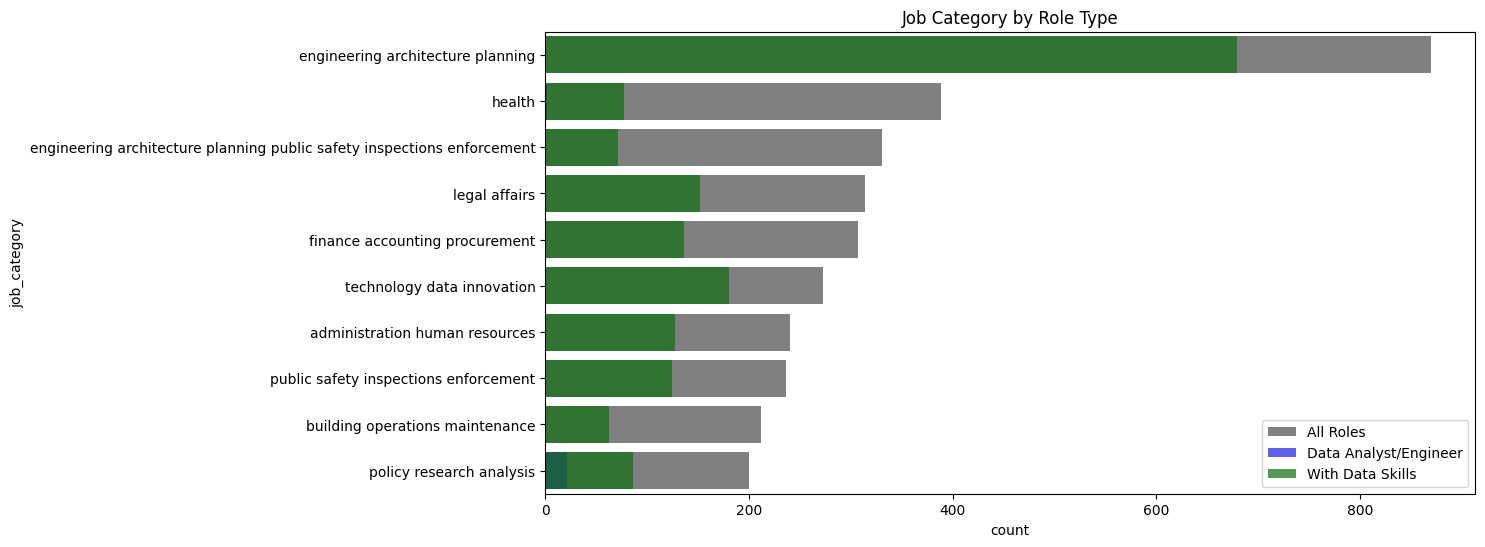

In [ ]:
# 6. Job Category Comparison
# Insight:
# Are data jobs concentrated in certain job categories (e.g., IT, Planning, Research)?

# What to look for:
# Which job categories are most common for data-related jobs?

# --> Compare job category (department) distributions by group
#
# - Plots the most frequent job categories (departments or domains) for all jobs and for data-related roles.
# - Reveals whether data jobs are concentrated in specific fields or spread across the organization.
#
# How to read this chart:
# - Each bar represents a job category; bar height shows number of postings in that category.
# - Compare between groups: data jobs might cluster in IT, Research, or Planning, whereas general jobs may be spread out.
# - Outliers can highlight unique domains hiring for data roles.

top_job_cats = df_merged['job_category'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.countplot(y='job_category', data=df_merged[df_merged['job_category'].isin(top_job_cats)], 
              order=top_job_cats, color='gray', label='All Roles')
sns.countplot(y='job_category', data=df_data_analyst[df_data_analyst['job_category'].isin(top_job_cats)],
              order=top_job_cats, color='blue', alpha=0.7, label='Data Analyst/Engineer')
sns.countplot(y='job_category', data=df_keywords[df_keywords['job_category'].isin(top_job_cats)],
              order=top_job_cats, color='green', alpha=0.7, label='With Data Skills')
plt.title('Job Category by Role Type')
plt.legend()
plt.show()

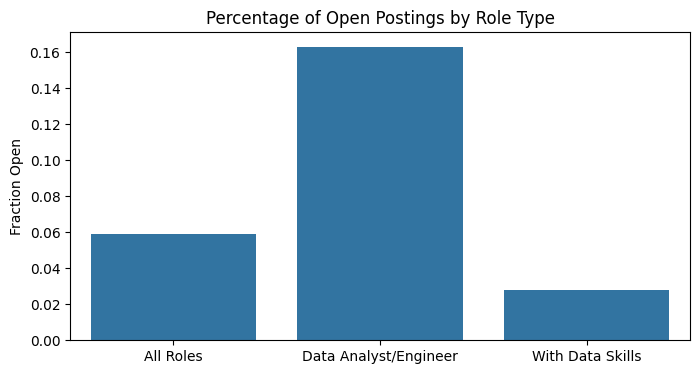

In [ ]:
# 7. Open vs Expired Postings
# Insight:
# Are data jobs open for longer or more likely to still be open?

# What to look for:
# Are a greater percentage of data roles still open?

# -- > Compare the status (open vs expired) of job postings by group
#
# - Uses a count plot or pie chart to show the proportion of currently open vs expired job postings in each group.
# - Helps understand if data roles stay open longer, or if they fill/expire faster than typical jobs.
#
# How to read this chart:
# - Each bar (or pie slice) shows the number or proportion of jobs still open versus expired.
# - Compare across groups to see if data jobs are harder to fill (more open) or more quickly filled (fewer open).

import datetime as dt

today = pd.Timestamp(dt.datetime.now())
for df in [df_merged, df_data_analyst, df_keywords]:
    df['is_open'] = df['post_until'] > today

plt.figure(figsize=(8,4))
sns.barplot(x=['All Roles','Data Analyst/Engineer','With Data Skills'],
            y=[df_merged['is_open'].mean(), df_data_analyst['is_open'].mean(), df_keywords['is_open'].mean()])
plt.title('Percentage of Open Postings by Role Type')
plt.ylabel('Fraction Open')
plt.show()

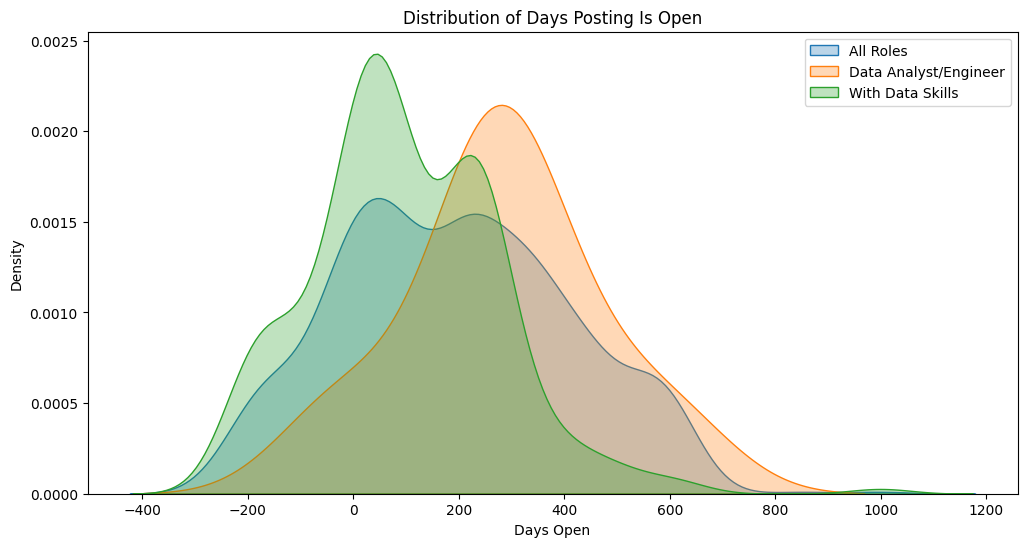

In [ ]:
# 8. Days Posting is Open
# Insight:
# Do data roles stay posted longer or shorter than the general population?

# What to look for:
# Are data roles posted for longer or shorter periods?

# --> Plot the distribution of days each posting was open by group
#
# - Shows the number of days a job remained posted (from posting to expiration/closing).
# - Highlights differences in hiring speed or demand for data roles versus the general job market.
#
# How to read this chart:
# - The x-axis shows how many days postings were open; the y-axis shows the frequency.
# - Compare group curves: a curve shifted right means jobs stay open longer; left means quicker filling.
# - Outliers or long tails suggest hard-to-fill roles.

for df in [df_merged, df_data_analyst, df_keywords]:
    df['days_open'] = (df['post_until'] - df['posting_date']).dt.days

plt.figure(figsize=(12,6))
sns.kdeplot(df_merged['days_open'].dropna(), label='All Roles', fill=True, alpha=0.3)
sns.kdeplot(df_data_analyst['days_open'].dropna(), label='Data Analyst/Engineer', fill=True, alpha=0.3)
sns.kdeplot(df_keywords['days_open'].dropna(), label='With Data Skills', fill=True, alpha=0.3)
plt.title('Distribution of Days Posting Is Open')
plt.xlabel('Days Open')
# plt.xlim(0, 1200)
plt.legend()
plt.show()